# Задачи классификации и кластеризации

**Домашнее задание к лекции «Задачи классификации и кластеризации»**

Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# загружаем данные по ирисам в виде Bunch-словаря
# https://pythonru.com/primery/sklearn-datasets?ysclid=ldfqsp0k60993772623

iris = load_iris()
type(iris)
# Ключи bunch -словаря 
print(iris.keys())


**data** — это необходимые для предсказания данные (показатели, полученные при сканировании, такие как радиус, площадь и другие) в массиве NumPy.

**target** — это целевые данные (переменная, которую вы хотите предсказать) в массиве NumPy.

**Описание тестового массива данных:**

In [ ]:
print(iris.DESCR)

In [ ]:
# загружаем данные в датафрейм
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# загружаем ответы в массив Numpy
data_class = iris.target


In [ ]:
data_class

In [ ]:
df.info()

Оставьте два признака - **sepal_length** и **sepal_width** и целевую переменную - **variety**:

In [ ]:
# оставим только нужные столбцы:
df = df[['sepal length (cm)', 'sepal width (cm)']]
# и переименуем их:
df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}, inplace=True)
df.info()

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, random_state=42)

In [ ]:
X_train

In [ ]:
print('Размер тренировочной выборки:',len(y_train))

In [ ]:
print('Размер тестовой выборки:',len(y_test))

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# создадим экзмпляр объёкта модели:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
print(f'Точность модели: {accuracy_score(y_test, y_pred):0.2f}')

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

In [ ]:
X_train

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
# **sepal_length** и **sepal_width**
small_train = X_train[['sepal_length', 'sepal_width']]
small_test = X_test[['sepal_length', 'sepal_width']]

In [ ]:
plt.scatter(x=small_train['sepal_length'], y=small_train['sepal_width'], c=y_train)
#plt.legend()
plt.show()


In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

In [ ]:
# сам scatter plot
plt.scatter(small_test['sepal_length'], small_test['sepal_width'], c=y_pred)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')


In [ ]:
# имеют значения признаки удалённости
lda_small.coef_

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

In [ ]:
df[['sepal_length','sepal_width']].corr()

In [ ]:
# заменим модель на логистическую регрессиию
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

**Предсказанное и реальное значение класса в логистической регрессии:**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
for i in range(len(y_pred)):
    print(f'{i+1}. Предсказанное значение класса: {y_pred[i]} реальное значение класса: {y_test[i]}')

In [ ]:
print(f'Точность модели логистической регрессии: {accuracy_score(y_pred, y_test):0.2f}')

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

In [ ]:
# сам scatter plot для логистической регрессии:
plt.scatter(small_test['sepal_length'], small_test['sepal_width'], c=y_pred)

## Кластеризация

Отбросьте целевую переменную и оставьте только два признака - **sepal_length** и **sepal_width**
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [ ]:
df.info()
df.head()

In [128]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [132]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(df)


In [134]:
from sklearn.cluster import KMeans

In [135]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

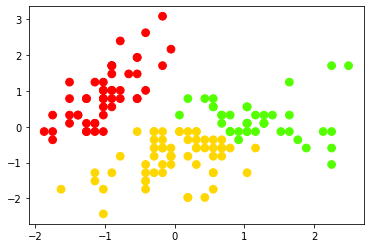

In [165]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='prism', c=clusters, s=60)

In [193]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 7)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(0, 0.5, 'Инерция')

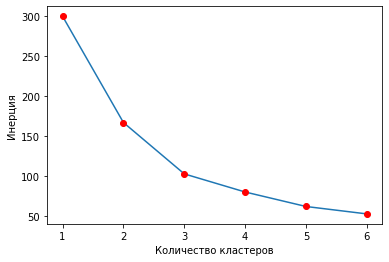

In [194]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

Иерархическая кластеризация

In [149]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

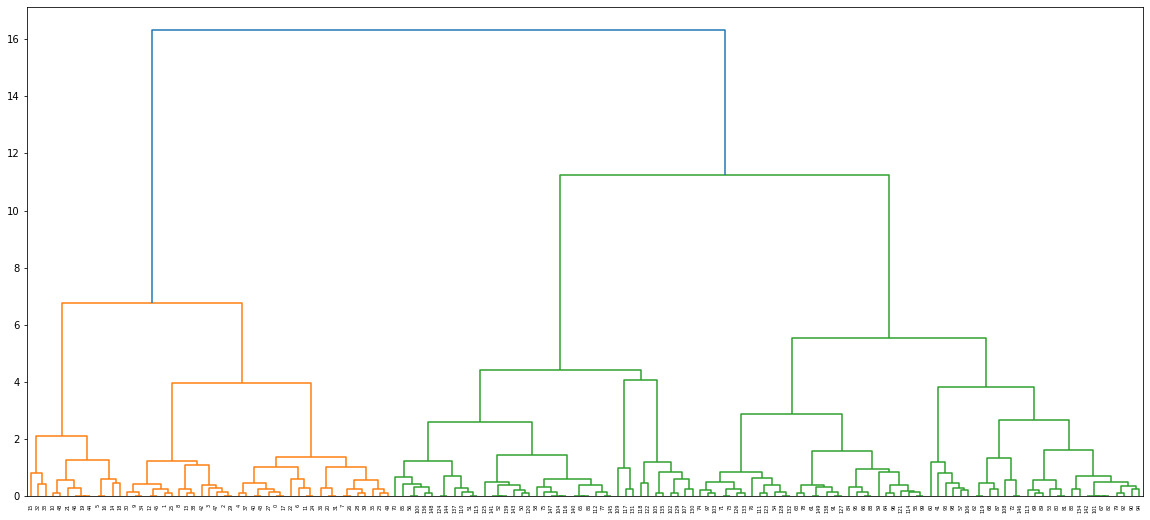

In [180]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)


In [191]:
type(dn)

dict

In [167]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [198]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

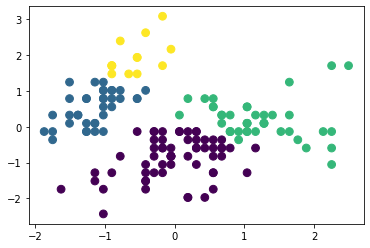

In [197]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)